In [1]:
import numpy as np
import seaborn as sns
import torch
import pandas as pd
import os
import matplotlib.pyplot as plt
import torchdeepretina as tdr
import tqdm

f2_response is unavailable until you run:
$ pip install -e git+git://github.com/nirum/jetpack.git@master#egg=jetpack


In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option("display.max_rows", 500)

In [3]:
prepath = "/home/grantsrb/src/torch-deep-retina/training_scripts/"

In [45]:
path = os.path.join(prepath, "linearstacked_101822/intr_data.csv")
intr_df = pd.read_csv(path, sep="!")
print("n_models:", len(intr_df))
intr_df.head()

n_models: 74208


,cell_file,cell_idx,stim_type,cell_type,layer,chan,row,col,cor,xshift,yshift,intr_stim,save_folder
0,amacrines_late_2012.h5,3,test,amacrine,sequential.0,4,18,27,0.732686,0,0,boxes,linearstacked_101822/linearstacked_101822_0_se...
1,amacrines_late_2012.h5,6,test,amacrine,sequential.0,4,18,22,0.718535,0,0,boxes,linearstacked_101822/linearstacked_101822_0_se...
2,unks_17-10-18.h5,4,test,unk,sequential.0,4,14,21,0.695059,0,0,boxes,linearstacked_101822/linearstacked_101822_0_se...
3,unks_17-10-18.h5,4,test,unk,sequential.0,6,14,21,0.681318,0,0,boxes,linearstacked_101822/linearstacked_101822_0_se...
4,amacrines_late_2012.h5,4,test,amacrine,sequential.0,4,21,30,0.674702,0,0,boxes,linearstacked_101822/linearstacked_101822_0_se...


In [51]:
{'sequential.0', 'sequential.4'} - set(intr_df["layer"])

set()

In [5]:
path = os.path.join(prepath, "linearstacked_101822/model_data.csv")
model_df = pd.read_csv(path, sep="!")
print("n_models:", len(model_df))
model_df.head()

n_models: 30


,abssum,activ_fxn,alpha_steps,altn_layers,amacrine_intr_cor,attn_size,batch_size,bias,bipolar_intr_cor,bn_moment,bnaftrelu,bnorm,bnorm_d,cells,chans,convgc,cross_val,cross_val_idx,datapath,dataset,description,drop_p,exp_name,exp_num,exp_num_offset,finalstack,gc_bias,horizontal_intr_cor,img_shape,intg_bsize,intr_cor,ksizes,l1,l2,log_poisson,lossfxn,lr,min_prune_acc,model_type,n_cv_folds,n_dropped_chans,n_epochs,n_heads,n_layers,n_repeats,n_units,noise,prune,prune_intvl,prune_layers,prune_tolerance,pruned_chans,rand_onehot,rand_sample,reset_lr,reset_sd,retinotopic,save_every_epoch,save_folder,scheduler,scheduler_patience,scheduler_scale,scheduler_thresh,search_keys,seed,self_attn,semantic_l1,semantic_scale,shift_labels,shuffle,softplus,stackconvs,startpt,stim_type,test_acc,test_loss,train_loss,unk_intr_cor,val_acc,val_loss,zero_bias
0,False,ReLU,10,False,0.505328,8,2500,True,0.387124,0.01,False,True,2,all,"[8, 8]",False,False,0,/home/TRAIN_DATA/,15-11-21b,NaN,0,linearstacked_101822,0,0,False,False,NaN,"[40, 50, 50]",500,0.486244,"[15, 11, 11]",0.0001,0.001,False,PoissonNLLLoss,0.005,0,LinearStackedBNCNN,10,"[0, 0]",100,8,3,1,17,0.05,False,15,[],0.01,"[8, 8]",False,True,False,False,False,False,linearstacked_101822/linearstacked_101822_0_se...,ReduceLROnPlateau,6,0.5,0.01,_seed123456_dataset15-11-21b_stim_typenaturals...,123456,False,0,0,False,True,True,True,NaN,naturalscene,0.637771,-3.134616,-1.652336,0.498998,0.638706,-4.468295,False
1,False,ReLU,10,False,0.563965,8,2500,True,0.556341,0.01,False,True,2,all,"[8, 8]",False,False,0,/home/TRAIN_DATA/,15-11-21b,NaN,0,linearstacked_101822,0,0,False,False,NaN,"[40, 50, 50]",500,0.553136,"[15, 11, 11]",0.0001,0.001,False,PoissonNLLLoss,0.005,0,LinearStackedBNCNN,10,"[0, 0]",100,8,3,1,17,0.05,False,15,[],0.01,"[8, 8]",False,True,False,False,False,False,linearstacked_101822/linearstacked_101822_0_se...,ReduceLROnPlateau,6,0.5,0.01,_seed345678_dataset15-11-21b_stim_typewhitenoise,345678,False,0,0,False,True,True,True,NaN,whitenoise,0.612827,-2.580484,-1.135506,0.530650,0.603886,-4.313980,False
2,False,ReLU,10,False,0.647035,8,2500,True,0.559233,0.01,False,True,2,all,"[8, 8]",False,False,0,/home/TRAIN_DATA/,15-11-21a,NaN,0,linearstacked_101822,0,0,False,False,NaN,"[40, 50, 50]",500,0.592112,"[15, 11, 11]",0.0001,0.001,False,PoissonNLLLoss,0.005,0,LinearStackedBNCNN,10,"[0, 0]",100,8,3,1,4,0.05,False,15,[],0.01,"[8, 8]",False,True,False,False,False,False,linearstacked_101822/linearstacked_101822_0_se...,ReduceLROnPlateau,6,0.5,0.01,_seed567891_dataset15-11-21a_stim_typenaturals...,567891,False,0,0,False,True,True,True,NaN,naturalscene,0.770417,-8.304065,-7.509150,0.502628,0.678943,-9.447746,False
3,False,ReLU,10,False,0.487786,8,2500,True,0.376251,0.01,False,True,2,all,"[8, 8]",False,False,0,/home/TRAIN_DATA/,15-10-07,NaN,0,linearstacked_101822,0,0,False,False,NaN,"[40, 50, 50]",500,0.473328,"[15, 11, 11]",0.0001,0.001,False,PoissonNLLLoss,0.005,0,LinearStackedBNCNN,10,"[0, 0]",100,8,3,1,5,0.05,False,15,[],0.01,"[8, 8]",False,True,False,False,False,False,linearstacked_101822/linearstacked_101822_0_se...,ReduceLROnPlateau,6,0.5,0.01,_seed456789_dataset15-10-07_stim_typenaturalscene,456789,False,0,0,False,True,True,True,NaN,naturalscene,0.697510,-2.352331,-2.530179,0.493982,0.640583,-3.426618,False
4,False,ReLU,10,False,0.585212,8,2500,True,0.505925,0.01,False,True,2,all,"[8, 8]",False,False,0,/home/TRAIN_DATA/,15-11-21a,NaN,0,linearstacked_101822,0,0,False,False,NaN,"[40, 50, 50]",500,0.553690,"[15, 11, 11]",0.0001,0.001,False,PoissonNLLLoss,0.005,0,LinearStackedBNCNN,10,"[0, 0]",100,8,3,1,4,0.05,False,15,[],0.01,"[8, 8]",False,True,False,False,False,False,linearstacked_101822/linearstacked_101822_0_se...,ReduceLROnPlateau,6,0.5,0.01,_seed123456_dataset15-11-21a_stim_typenaturals...,123456,False,0,0,False,True,True,True,NaN,naturalscene,0.771839,-8.419974,-7.358105,0.516781,0.668688,-9.181877,False


In [6]:
sim_files = sorted(os.listdir(prepath+"similarity_csvs"))
for i,sim in enumerate(sim_files):
    print(i,sim)

0 2layer_same_similarities.csv
1 bests_all_similarities.csv
2 bests_similarities.csv
3 bncnn_pruning_all_similarities.csv
4 bncnn_pruning_same_similarities.csv
5 convgc1_gcchanssim14_ccagcpathsim.csv
6 convgc_bests_all_similarities.csv
7 convgc_bests_bests_chan_similarities.csv
8 convgc_bests_bests_similarities.csv
9 convgc_bests_similarities.csv
10 deletemes_similarities.csv
11 gcchansearch_all_similarities.csv
12 gcchansearch_all_similarities_maxonly.csv
13 gcchansearch_chan_similarities.csv
14 gcchansearch_same_similarities.csv
15 gcchansearch_same_similarities.csv.copy
16 gcchansearch_same_similarities_maxonly.csv
17 intrnrn_same_similarities.csv
18 intrnrns_bests_all_similarities.csv
19 intrnrns_bests_linearstacked_101822_all_similarities.csv
20 intrnrns_same_similarities.csv
21 linearstacked_101822_all_similarities.csv
22 linearstacked_101822_linearstacked_101822_all_similarities.csv
23 linearstacked_101822_same_perm_similarities.csv
24 linearstacked_101822_same_similarities.csv


In [7]:
idxs = [22, 19]

files = [sim_files[i] for i in idxs]
files

['linearstacked_101822_linearstacked_101822_all_similarities.csv',
 'intrnrns_bests_linearstacked_101822_all_similarities.csv']

In [8]:
dfs = []
for i in range(len(files)):
    path = os.path.join(prepath, "similarity_csvs", files[i])
    df = pd.read_csv(path,sep="!")
    dfs.append(df)
og_cors = pd.concat(dfs).reset_index()
og_cors = og_cors.loc[og_cors["model1"]!=og_cors["model2"]]
og_cors

,index,chan1,chan2,cor,cor_type,m1_layer,m2_layer,model1,model2,xy_coord
32,32,0,5,0.700854,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)"
33,33,1,5,0.767521,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)"
34,34,2,5,0.802463,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)"
35,35,3,5,0.730706,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)"
36,36,4,5,0.809689,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)"
...,...,...,...,...,...,...,...,...,...,...
31675,2875,0,2,0.904131,max_act,sequential.0,sequential.4,intrnrns_bests/intrnrns_697_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)"
31676,2876,0,2,0.583767,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_697_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)"
31677,2877,0,4,0.314189,max_act,sequential.0,sequential.4,intrnrns_bests/intrnrns_697_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)"
31678,2878,0,5,0.752270,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_697_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)"


In [9]:
model_df = model_df[["save_folder", "test_acc"]] 

In [10]:
cors = og_cors.loc[(~og_cors["model1"].isna())&(~og_cors["model2"].isna())]
cors["model1"] = cors["model1"].astype("string")
cors["model2"] = cors["model2"].astype("string")
cors["is_intr"] = cors.apply(lambda x: "intrnrn" in x.model1 or "intrnrn" in x.model2, axis=1)
cors["is_intr"] = cors["is_intr"].astype("bool")
cors["save_folder"] = cors["model1"]
cors.loc[cors["is_intr"], "save_folder"] = cors["model2"]
cors = cors.reset_index()
cors = cors.merge(right=model_df, on="save_folder", how="inner")
cors["cell"] = "[0]"

cors["dataset"] =   cors.apply(lambda x: x.model1.split("dataset")[-1].split("_")[0], axis=1)
cors["stim_type"] = cors.apply(lambda x: x.model1.split("stim_type")[-1].split("_")[0], axis=1)
cors["datatype"] =  cors["dataset"]+cors["stim_type"]
cors["seed"] =      cors.apply(lambda x: x.model1.split("seed")[-1].split("_")[0], axis=1)

cors["dataset2"] = cors.apply(lambda x: x.model2.split("dataset")[-1].split("_")[0], axis=1)
cors["stim_type2"] = cors.apply(lambda x: x.model2.split("stim_type")[-1].split("_")[0], axis=1)
cors["datatype2"] = cors["dataset2"]+cors["stim_type2"]
cors["seed2"] = cors.apply(lambda x: x.model2.split("seed")[-1].split("_")[0], axis=1)

cors.loc[cors["is_intr"], "model_dataset"] = cors["dataset2"]
cors.loc[cors["is_intr"], "model_stim_type"] = cors["stim_type2"]
cors.loc[cors["is_intr"], "model_datatype"] = cors["datatype2"]
cors.loc[cors["is_intr"], "model_seed"] = cors["seed2"]
cors.loc[cors["is_intr"], "cell"] = cors.loc[cors["is_intr"]].apply(lambda x: x.model1.split("cells")[-1].split("_")[0], axis=1)

cors.loc[~cors["is_intr"], "model_dataset"] = cors["dataset"]
cors.loc[~cors["is_intr"], "model_stim_type"] = cors["stim_type"]
cors.loc[~cors["is_intr"], "model_datatype"] = cors["datatype"]
cors.loc[~cors["is_intr"], "model_seed"] = cors["seed"]

cors["cell"] = cors.apply(lambda x: x.cell[1:-1], axis=1).astype("int")
cors

,level_0,index,chan1,chan2,cor,cor_type,m1_layer,m2_layer,model1,model2,xy_coord,is_intr,save_folder,test_acc,cell,dataset,stim_type,datatype,seed,dataset2,stim_type2,datatype2,seed2,model_dataset,model_stim_type,model_datatype,model_seed
0,32,32,0,5,0.700854,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.637771,0,15-11-21b,naturalscene,15-11-21bnaturalscene,123456,15-11-21b,whitenoise,15-11-21bwhitenoise,345678,15-11-21b,naturalscene,15-11-21bnaturalscene,123456
1,33,33,1,5,0.767521,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.637771,0,15-11-21b,naturalscene,15-11-21bnaturalscene,123456,15-11-21b,whitenoise,15-11-21bwhitenoise,345678,15-11-21b,naturalscene,15-11-21bnaturalscene,123456
2,34,34,2,5,0.802463,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.637771,0,15-11-21b,naturalscene,15-11-21bnaturalscene,123456,15-11-21b,whitenoise,15-11-21bwhitenoise,345678,15-11-21b,naturalscene,15-11-21bnaturalscene,123456
3,35,35,3,5,0.730706,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.637771,0,15-11-21b,naturalscene,15-11-21bnaturalscene,123456,15-11-21b,whitenoise,15-11-21bwhitenoise,345678,15-11-21b,naturalscene,15-11-21bnaturalscene,123456
4,36,36,4,5,0.809689,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.637771,0,15-11-21b,naturalscene,15-11-21bnaturalscene,123456,15-11-21b,whitenoise,15-11-21bwhitenoise,345678,15-11-21b,naturalscene,15-11-21bnaturalscene,123456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30715,31559,2759,0,7,0.439564,max_act,sequential.0,sequential.4,intrnrns_bests/intrnrns_666_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.614866,11,unks,intrnrns,unksintrnrns,intrnrns,15-11-21b,naturalscene,15-11-21bnaturalscene,456789,15-11-21b,naturalscene,15-11-21bnaturalscene,456789
30716,31618,2818,0,3,0.212656,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_682_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.614866,12,unks,intrnrns,unksintrnrns,intrnrns,15-11-21b,naturalscene,15-11-21bnaturalscene,456789,15-11-21b,naturalscene,15-11-21bnaturalscene,456789
30717,31619,2819,0,1,0.420002,max_act,sequential.0,sequential.4,intrnrns_bests/intrnrns_682_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.614866,12,unks,intrnrns,unksintrnrns,intrnrns,15-11-21b,naturalscene,15-11-21bnaturalscene,456789,15-11-21b,naturalscene,15-11-21bnaturalscene,456789
30718,31678,2878,0,5,0.752270,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_697_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.614866,13,unks,intrnrns,unksintrnrns,intrnrns,15-11-21b,naturalscene,15-11-21bnaturalscene,456789,15-11-21b,naturalscene,15-11-21bnaturalscene,456789


In [11]:
df1 = cors.loc[cors["is_intr"]]

# For each interneuron, get best correlated cell from each model
groups = ["model1", "model2"]
df1_maxes = df1.sort_values(by="cor", ascending=False).drop_duplicates(groups).reset_index(drop=True)
df1_maxes
#df1_maxes = 
#print("Maxes Len:", len(df1_maxes))
## Average over best correlations with each interneuron model of a particular type (i.e. bipolar, amacrine, unk..) 
#intr_avg = df1_maxes.groupby(["model1", "dataset", "stim_type", "m1_layer", "chan1", "dataset2", "stim_type2", "datatype2"]).mean().reset_index()
#print("Len:", len(intr_avg))
#intr_avg.head()

,level_0,index,chan1,chan2,cor,cor_type,m1_layer,m2_layer,model1,model2,xy_coord,is_intr,save_folder,test_acc,cell,dataset,stim_type,datatype,seed,dataset2,stim_type2,datatype2,seed2,model_dataset,model_stim_type,model_datatype,model_seed
0,30330,1530,0,2,0.985765,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_359_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.736262,13,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,345678
1,30340,1540,0,0,0.980709,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_359_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.738546,13,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,234567,15-11-21a,whitenoise,15-11-21awhitenoise,234567
2,30102,1302,0,7,0.980098,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_299_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.606012,9,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21b,whitenoise,15-11-21bwhitenoise,123456,15-11-21b,whitenoise,15-11-21bwhitenoise,123456
3,30280,1480,0,0,0.978692,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_345_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.738546,12,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,234567,15-11-21a,whitenoise,15-11-21awhitenoise,234567
4,29310,510,0,2,0.978662,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_102_datasetbipolars_la...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.736262,2,bipolars,intrnrns,bipolarsintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,345678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,30849,2049,0,0,0.223439,max_act,sequential.0,sequential.4,intrnrns_bests/intrnrns_501_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.771839,0,unks,intrnrns,unksintrnrns,intrnrns,15-11-21a,naturalscene,15-11-21anaturalscene,123456,15-11-21a,naturalscene,15-11-21anaturalscene,123456
1436,30881,2081,0,5,0.219861,max_act,sequential.0,sequential.4,intrnrns_bests/intrnrns_501_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.738546,0,unks,intrnrns,unksintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,234567,15-11-21a,whitenoise,15-11-21awhitenoise,234567
1437,31611,2811,0,1,0.210622,max_act,sequential.0,sequential.4,intrnrns_bests/intrnrns_682_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.742831,12,unks,intrnrns,unksintrnrns,intrnrns,15-11-21a,naturalscene,15-11-21anaturalscene,345678,15-11-21a,naturalscene,15-11-21anaturalscene,345678
1438,31601,2801,0,5,0.196689,max_act,sequential.0,sequential.4,intrnrns_bests/intrnrns_682_datasetunks_17-10-...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",True,linearstacked_101822/linearstacked_101822_0_se...,0.738546,12,unks,intrnrns,unksintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,234567,15-11-21a,whitenoise,15-11-21awhitenoise,234567


In [14]:
print("Len DF:", len(df1_maxes))
print("Calculated Len:", len(set(df1["model1"]))*5*6)

Len DF: 1440
Calculated Len: 1440


In [15]:
df2 = cors.loc[~cors["is_intr"]]
df2 = df2.loc[(df2["datatype"]==df2["datatype2"])&(df2["seed"]!=df2["seed2"])]

# Get best correlation from each model copy over different seeds 
groups = ["model1", "dataset", "stim_type", "seed", "model2", "dataset2", "stim_type2", "seed2", "m1_layer", "chan1"]
df2_maxes = df2.sort_values(by="cor",ascending=False).drop_duplicates(groups).reset_index(drop=True)
print(len(df2_maxes))
## Average over best correlation from each model copy averaging over different seeds 
#model_avg = df2_maxes.groupby(["model1", "dataset", "stim_type", "seed", "model2", "m1_layer", "chan1"]).mean().reset_index()
#print(len(model_avg))
#model_avg.head()

#dataset = "15-10-07"
#stim_type = "naturalscene"
#groups = ["model1", "dataset", "stim_type", "seed", "model2", "dataset2", "stim_type2", "m1_layer", "chan1"]
#x = df2_maxes.loc[(df2_maxes["dataset"]==dataset)&(df2_maxes["stim_type"]==stim_type)&(df2_maxes["datatype"]==df2_maxes["datatype2"])&(~df2_maxes["intrnrn_comp"])&(df2_maxes["seed"]!=df2_maxes["seed2"])].groupby(groups).max().reset_index()
##x.groupby("model1").mean()
#len(x)

1920


In [16]:
print("Len DF:", len(df2_maxes))
print("Calculated Len:", len(set(df2["model1"]))*16*4)

Len DF: 1920
Calculated Len: 1920


In [27]:
wide_df = df1_maxes.merge(
    right=df2_maxes, how="left",
    left_on=["model2", "m2_layer", "chan2", "seed2"],
    right_on=["model1", "m1_layer", "chan1", "seed"]
).sort_values(by=["cor_x","cor_y"], ascending=False)#.drop_duplicates(["model1_x", "model2_x"])
wide_df

,level_0_x,index_x,chan1_x,chan2_x,cor_x,cor_type_x,m1_layer_x,m2_layer_x,model1_x,model2_x,xy_coord_x,is_intr_x,save_folder_x,test_acc_x,cell_x,dataset_x,stim_type_x,datatype_x,seed_x,dataset2_x,stim_type2_x,datatype2_x,seed2_x,model_dataset_x,model_stim_type_x,model_datatype_x,model_seed_x,level_0_y,index_y,chan1_y,chan2_y,cor_y,cor_type_y,m1_layer_y,m2_layer_y,model1_y,model2_y,xy_coord_y,is_intr_y,save_folder_y,test_acc_y,cell_y,dataset_y,stim_type_y,datatype_y,seed_y,dataset2_y,stim_type2_y,datatype2_y,seed2_y,model_dataset_y,model_stim_type_y,model_datatype_y,model_seed_y
0,30330,1530,0,2,0.985765,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_359_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.736262,13,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15042,15042,2,0,0.994181,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.736262,0,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,234567,15-11-21a,whitenoise,15-11-21awhitenoise,345678
1,30330,1530,0,2,0.985765,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_359_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.736262,13,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,345678,14562,14562,2,1,0.993406,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.736262,0,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,567891,15-11-21a,whitenoise,15-11-21awhitenoise,345678
2,30330,1530,0,2,0.985765,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_359_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.736262,13,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,345678,14754,14754,2,3,0.991436,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.736262,0,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,456789,15-11-21a,whitenoise,15-11-21awhitenoise,345678
3,30330,1530,0,2,0.985765,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_359_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.736262,13,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15266,15266,2,4,0.988786,max_act,sequential.0,sequential.0,linearstacked_101822/linearstacked_101822_0_se...,linearstacked_101822/linearstacked_101822_0_se...,"(18, 18)",False,linearstacked_101822/linearstacked_101822_0_se...,0.736262,0,15-11-21a,whitenoise,15-11-21awhitenoise,345678,15-11-21a,whitenoise,15-11-21awhitenoise,123456,15-11-21a,whitenoise,15-11-21awhitenoise,345678
4,30340,1540,0,0,0.980709,max_act,sequential.0,sequential.0,intrnrns_bests/intrnrns_359_datasetamacrines_l...,linearstacked_101822/linearstacked_101822_0_se...,"(22, 22)",True,linearstacked_101822/linearstacked_101822_0_se...,0.738546,13,amacrines,intrnrns,amacrinesintrnrns,intrnrns,15-11-21a,whitenoise,15-11-21awhitenoise,234567,15-11-21a,whitenoise,15-11-21awhitenois

In [29]:
print("Len DF:", len(wide_df))
print(len(set(df1_maxes["model2"])))
print(len(set(df1_maxes["model1"])))
print("Calculated Len:", len(set(df1_maxes["model2"]))*len(set(df1_maxes["model1"]))*4)

Len DF: 5760
30
48
Calculated Len: 5760


In [30]:
retina_map = {
    "15-10-07": 1,
    "15-11-21a": 2,
    "15-11-21b": 3,
}
wide_df["\nRetina"] = wide_df.apply(lambda x: retina_map[x.model_dataset_x], axis=1)
wide_df["\nStimulus Type"] = wide_df["model_stim_type_x"]
wide_df["Retina"] = wide_df.apply(lambda x: retina_map[x.model_dataset_x], axis=1)
wide_df["Stimulus Type"] = wide_df["model_stim_type_x"]

colors = [sns.color_palette("bright")[2], sns.color_palette("bright")[4], sns.color_palette("bright")[-1]]
p = {i+1: colors[i] for i in range(len(colors))}

In [31]:
len(set(df1_maxes.loc[df1_maxes["dataset"]=="bipolars"]["model1"]))

7

3240


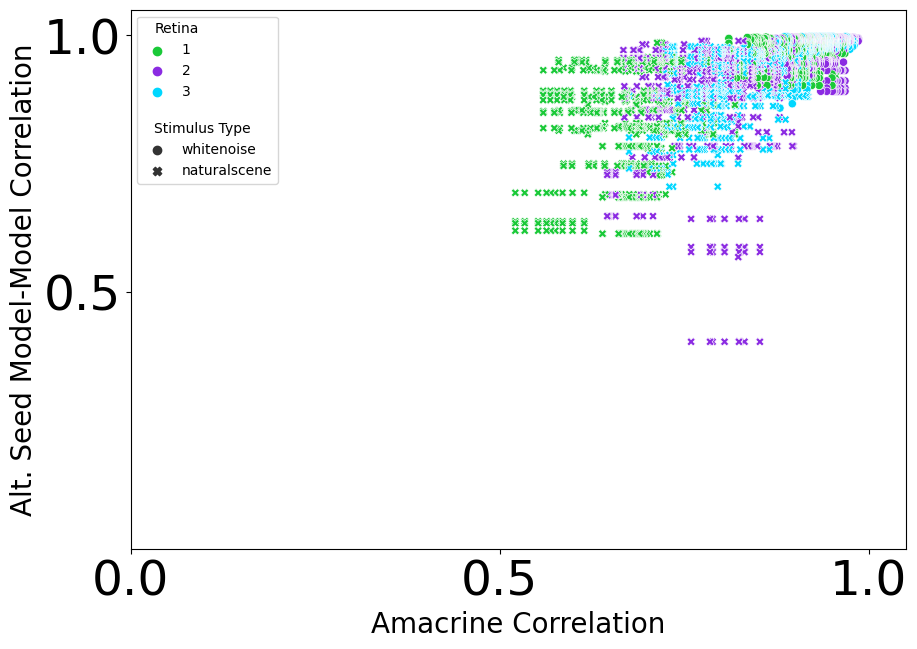

In [39]:
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
temp = wide_df.loc[wide_df["dataset_x"]=="amacrines"]
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="cor_x", y="cor_y", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p)
ax.set_ylabel("Alt. Seed Model-Model Correlation", fontsize=20)
ax.set_xlabel("Amacrine Correlation", fontsize=20)
plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
plt.show()

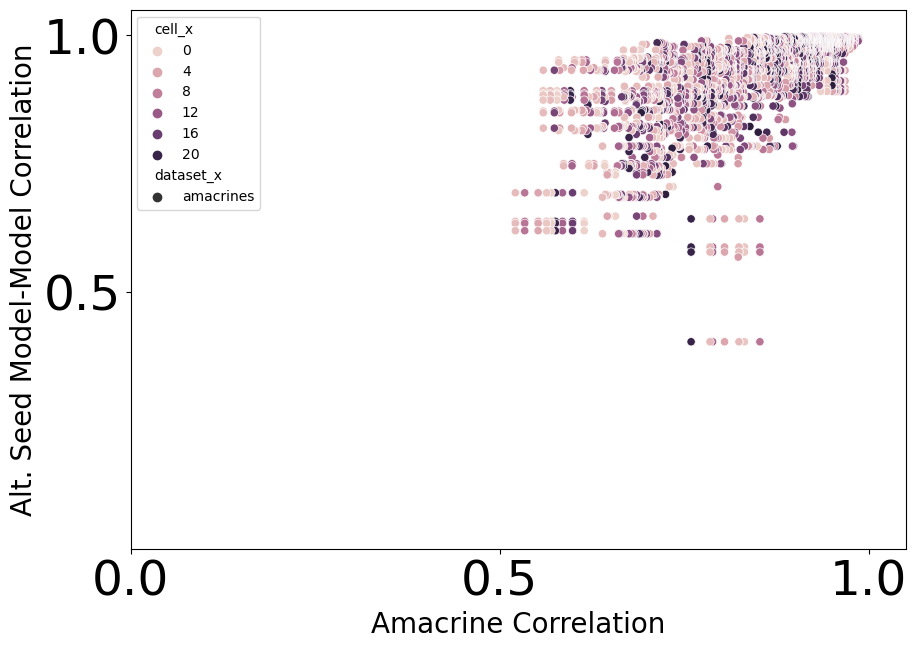

In [40]:
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
temp = wide_df.loc[wide_df["dataset_x"]=="amacrines"]
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="cor_x", y="cor_y", style="dataset_x", hue="cell_x", data=temp, ax=ax)
ax.set_ylabel("Alt. Seed Model-Model Correlation", fontsize=20)
ax.set_xlabel("Amacrine Correlation", fontsize=20)
plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
plt.show()

The issue we're seeing is because multiple amacrine cells maximally correlate with the same model cell. This is partially by design because we're looking at correlations from 16 model cells to all of the different interneurons. This should be fixed soon.

840


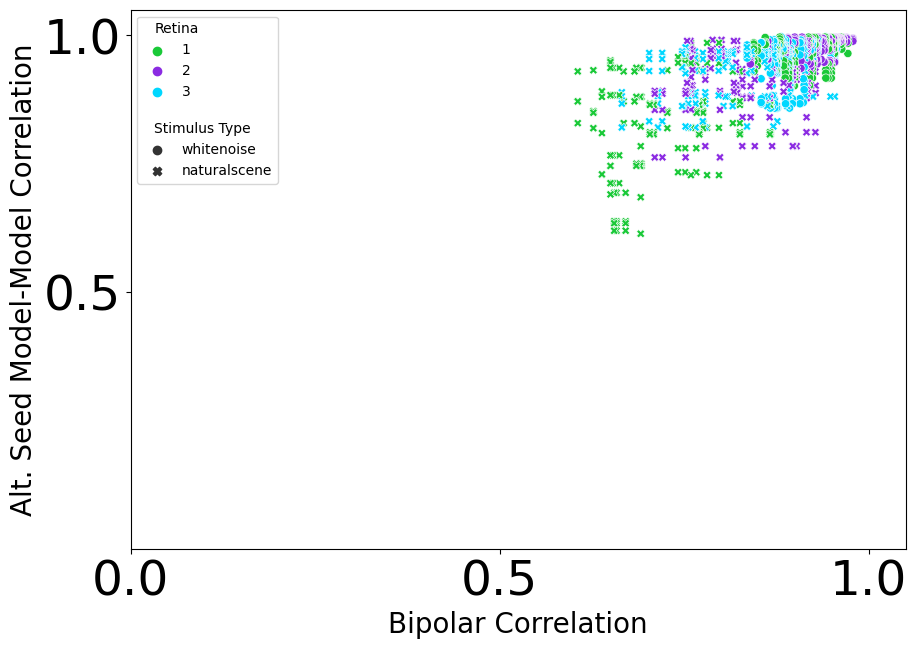

In [42]:
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
temp = wide_df.loc[wide_df["dataset_x"]=="bipolars"]
print(len(temp))
#temp = temp.loc[(temp["Retina"]==1)&(temp["Stimulus Type"]=="naturalscene")]
sns.scatterplot(x="cor_x", y="cor_y", style="\nStimulus Type", hue="Retina", data=temp, ax=ax, palette=p)
ax.set_ylabel("Alt. Seed Model-Model Correlation", fontsize=20)
ax.set_xlabel("Bipolar Correlation", fontsize=20)
plt.xticks([i*0.1 for i in range(0,11,5)],fontsize=35)
plt.xlim([0, 1.05])
plt.yticks([i*0.1 for i in range(5,11,5)],fontsize=35)
plt.ylim([0, 1.05])
plt.show()

## Avg Model Interneuron Figures

In [ ]:
df["model1"] = df["save_folder"]
cors = og_cors.merge(right=df, on="model1", how="inner")
del df["model1"]
df["model2"] = df["save_folder"]
cors = cors.merge(right=df, on="model2", how="inner")
cors = cors.loc[(cors["test_acc_x"]>.5)&(cors["test_acc_y"]>.5)]
cors

In [18]:
temp = cors.loc[(cors["dataset_x"]==cors["dataset_y"])&(cors["stim_type_x"]==cors["stim_type_y"])&(cors["seed_x"]!=cors["seed_y"])]
avg_over_seeds = temp.groupby(["model1", "dataset_x", "stim_type_x", "seed_x", "chan1", "m1_layer"]).mean().reset_index()
avg_over_seeds.head()

,model1,dataset_x,stim_type_x,seed_x,chan1,m1_layer,chan2,cor,test_acc_x,amacrine_intr_cor_x,bipolar_intr_cor_x,unk_intr_cor_x,seed_y,test_acc_y,amacrine_intr_cor_y,bipolar_intr_cor_y,unk_intr_cor_y
0,linearstacked_101822/linearstacked_101822_0_se...,15-10-07,naturalscene,123456,0,sequential.0,NaN,0.706493,0.689118,0.420472,0.3075,0.460538,401231.25,0.677705,0.454641,0.337829,0.496676
1,linearstacked_101822/linearstacked_101822_0_se...,15-10-07,naturalscene,123456,0,sequential.4,NaN,0.449627,0.689118,0.420472,0.3075,0.460538,401231.25,0.677705,0.454641,0.337829,0.496676
2,linearstacked_101822/linearstacked_101822_0_se...,15-10-07,naturalscene,123456,1,sequential.0,NaN,0.768216,0.689118,0.420472,0.3075,0.460538,401231.25,0.677705,0.454641,0.337829,0.496676
3,linearstacked_101822/linearstacked_101822_0_se...,15-10-07,naturalscene,123456,1,sequential.4,NaN,0.322334,0.689118,0.420472,0.3075,0.460538,401231.25,0.677705,0.454641,0.337829,0.496676
4,linearstacked_101822/linearstacked_101822_0_se...,15-10-07,naturalscene,123456,2,sequential.0,NaN,0.554486,0.689118,0.420472,0.3075,0.460538,401231.25,0.677705,0.454641,0.337829,0.496676


In [21]:
retina_map = {
    "15-10-07": 1,
    "15-11-21a": 2,
    "15-11-21b": 3,
}
avg_over_seeds["\nRetina"] = avg_over_seeds.apply(lambda x: retina_map[x.dataset_x], axis=1)
avg_over_seeds["\nStimulus Type"] = avg_over_seeds["stim_type_x"]
avg_over_seeds["Retina"] = avg_over_seeds.apply(lambda x: retina_map[x.dataset_x], axis=1)
avg_over_seeds["Stimulus Type"] = avg_over_seeds["stim_type_x"]

In [26]:
colors = [sns.color_palette("bright")[2], sns.color_palette("bright")[4], sns.color_palette("bright")[-1]]
p = {i+1: colors[i] for i in range(len(colors))}

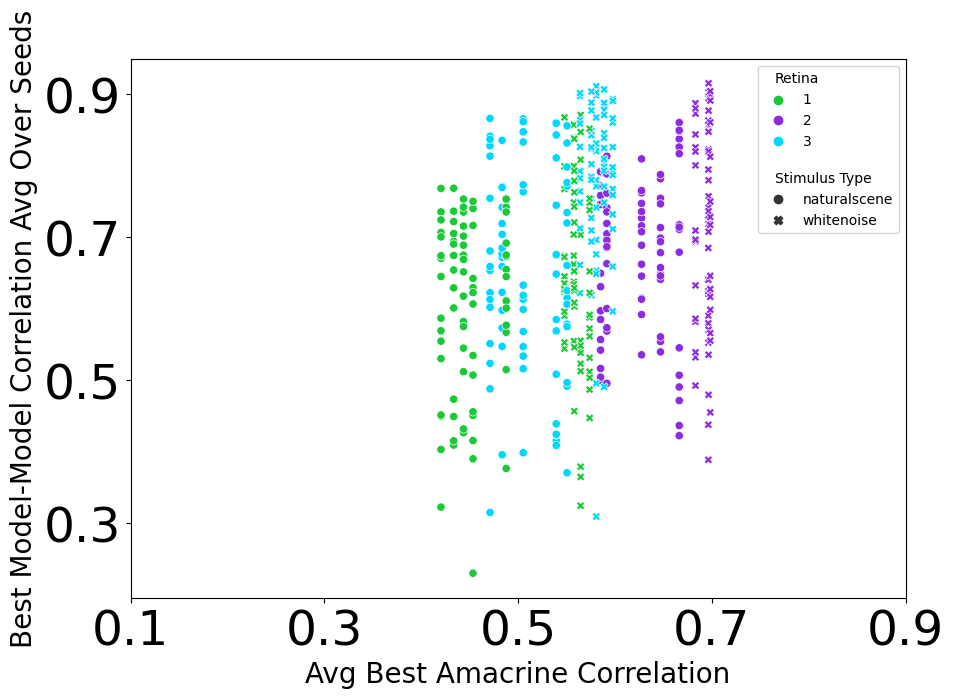

In [31]:
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
sns.scatterplot(x="amacrine_intr_cor_x", y="cor", style="\nStimulus Type", hue="Retina", data=avg_over_seeds, ax=ax, palette=p)
ax.set_ylabel("Best Model-Model Correlation Avg Over Seeds", fontsize=20)
ax.set_xlabel("Avg Best Amacrine Correlation", fontsize=20)
plt.xticks([i*0.1 for i in range(1,10,2)],fontsize=35)
plt.yticks([i*0.1 for i in range(3,10,2)],fontsize=35)
plt.show()

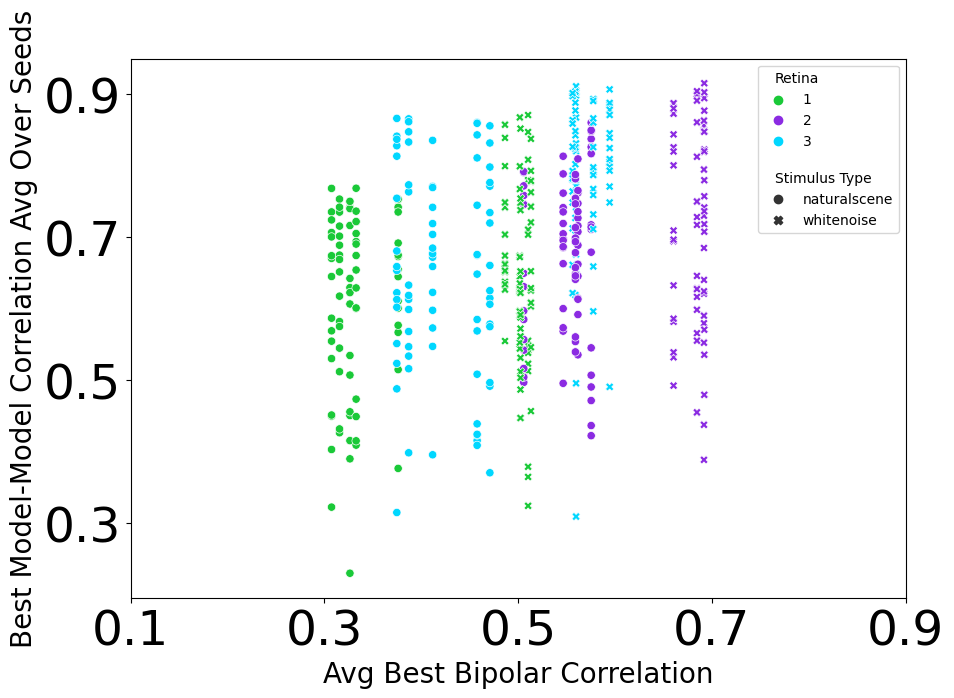

In [32]:
fig = plt.figure(figsize=(10,7))
ax = plt.gca()
sns.scatterplot(x="bipolar_intr_cor_x", y="cor", style="\nStimulus Type", hue="Retina", data=avg_over_seeds, ax=ax, palette=p)
ax.set_ylabel("Best Model-Model Correlation Avg Over Seeds", fontsize=20)
ax.set_xlabel("Avg Best Bipolar Correlation", fontsize=20)
plt.xticks([i*0.1 for i in range(1,10,2)],fontsize=35)
plt.yticks([i*0.1 for i in range(3,10,2)],fontsize=35)
plt.show()

## Convgc Histogram

(array([  82.,  416.,  884., 1044., 1528., 1729., 1328., 1210.,  633.,
         168.]),
 array([-0.87996775, -0.70589477, -0.5318218 , -0.35774882, -0.18367585,
        -0.00960287,  0.1644701 ,  0.33854308,  0.51261605,  0.68668903,
         0.860762  ]),
 <a list of 10 Patch objects>)

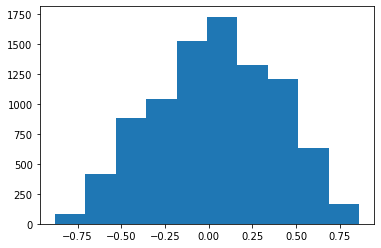

In [63]:
conv_df = conv_cors.loc[conv_cors['model1']!=conv_cors['model2']]
plt.hist(conv_df['cor'])

## Intr to Conv Prep

In [64]:
stim = tdr.stimuli.repeat_white(5000,nx=50,rand_spat=True)
stim = tdr.stimuli.rolling_window(stim,40)

conv_folders = []
datasets = ['15-10-07','15-11-21a','15-11-21b']
stim_types = ['naturalscene','whitenoise']
pre = os.path.join(prepath.split("training_scripts")[0],"models")
for dataset in datasets:
    for stim_type in stim_types:
        name = "convgc_{}_{}.pt".format(dataset,stim_type)
        conv_folders.append(name)
        
table = {
    "conv_model":[],
    "intr_model":[],
    "conv_row":[],
    "conv_col":[],
    "conv_layer":[],
    "conv_chan":[],
    "intr_row":[],
    "intr_col":[],
    "intr_layer":[],
    "intr_chan":[],
    "cor":[],
}

for i in range(len(intr_folders)):
    intr_sf = intr_folders[i]
    path = os.path.join(prepath,intr_sf)
    m1 = tdr.io.load_model(path)
    m1.eval()
    m1.cuda()
    m1.tile_output(True)
    resp1 = tdr.utils.inspect(m1,stim,to_numpy=True)['outputs']
    m1.cpu()
    intr_row, intr_col = int(resp1.shape[-2]//2), int(resp1.shape[-1]//2)
    resp1 = resp1[..., intr_row,intr_col]
    for j in tqdm.tqdm(range(len(conv_folders))):
        conv_sf = conv_folders[j]
        path = os.path.join(pre,conv_sf)
        m2 = tdr.io.load_model(path)
        m2.eval()
        m2.cuda()
        m2.tile_output(True)
        layers = tdr.utils.get_conv_layer_names(m2)[:-1]
        response = tdr.utils.inspect(m2,stim,insp_keys=layers,to_numpy=True)
        m2.cpu()
        for layer in layers:
            resp2 = response[layer]
            chans,height,width = resp2.shape[1:]
            cor_mtx = tdr.utils.mtx_cor(resp1,resp2,to_numpy=True)
            cor_mtx = cor_mtx.reshape(len(cor_mtx),chans,-1)
            argmaxs = np.argmax(cor_mtx[0],axis=-1)
            locs = list(zip(*np.unravel_index(argmaxs,(height,width)))) # list of row,col for each chan
            cor_mtx = cor_mtx.reshape(len(cor_mtx),chans,height,width)
            for chan in range(len(locs)):
                table["conv_model"].append(conv_sf)
                table["intr_model"].append(intr_sf)
                row,col = locs[chan]
                table["conv_row"].append(row)
                table["conv_col"].append(col)
                table["conv_layer"].append(layer)
                table["conv_chan"].append(chan)
                table["intr_row"].append(intr_row)
                table["intr_col"].append(intr_col)
                table["intr_layer"].append("output")
                table["intr_chan"].append(0)
                table["cor"].append(cor_mtx[0,chan,row,col])

cross_cors = pd.DataFrame(table)
cross_cors
    

100%|██████████| 6/6 [00:08<00:00,  1.35s/it]


,conv_model,intr_model,conv_row,conv_col,conv_layer,conv_chan,intr_row,intr_col,intr_layer,intr_chan,cor
0,convgc_15-10-07_naturalscene.pt,intrnrns/intrnrns_203_datasetamacrines_late_20...,22,32,sequential.0,0,22,22,output,0,0.120696
1,convgc_15-10-07_naturalscene.pt,intrnrns/intrnrns_203_datasetamacrines_late_20...,35,21,sequential.0,1,22,22,output,0,0.129211
2,convgc_15-10-07_naturalscene.pt,intrnrns/intrnrns_203_datasetamacrines_late_20...,19,20,sequential.0,2,22,22,output,0,0.585998
3,convgc_15-10-07_naturalscene.pt,intrnrns/intrnrns_203_datasetamacrines_late_20...,18,18,sequential.0,3,22,22,output,0,0.279902
4,convgc_15-10-07_naturalscene.pt,intrnrns/intrnrns_203_datasetamacrines_late_20...,30,19,sequential.0,4,22,22,output,0,0.123152
...,...,...,...,...,...,...,...,...,...,...,...
2875,convgc_15-11-21b_whitenoise.pt,intrnrns/intrnrns_122_datasetamacrines_early_2...,15,3,sequential.4,3,22,22,output,0,0.145450
2876,convgc_15-11-21b_whitenoise.pt,intrnrns/intrnrns_122_datasetamacrines_early_2...,4,18,sequential.4,4,22,22,output,0,0.104602
2877,convgc_15-11-21b_whitenoise.pt,intrnrns/intrnrns_122_datasetamacrines_early_2...,16,25,sequential.4,5,22,22,output,0,0.559756
2878,convgc_15-11-21b_whitenoise.pt,intrnrns/intrnrns_122_datasetamacrines_early_2...,14,23,sequential.4,6,22,22,output,0,0.531210


## Intr to Model All

(array([1113.,  303.,  212.,  202.,  285.,  258.,  267.,  165.,   66.,
           9.]),
 array([0.05865389, 0.13616503, 0.21367618, 0.29118732, 0.36869846,
        0.44620961, 0.52372075, 0.6012319 , 0.67874304, 0.75625418,
        0.83376533]),
 <a list of 10 Patch objects>)

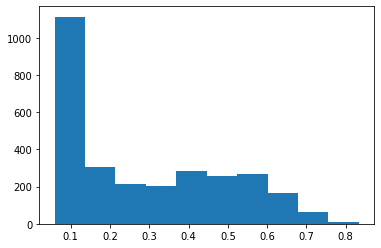

In [65]:
plt.hist(cross_cors['cor'])

## Intr to Model Bests

(array([ 2.,  5.,  7.,  9., 23., 21., 46., 38., 23.,  6.]),
 array([0.14399412, 0.21297124, 0.28194836, 0.35092548, 0.4199026 ,
        0.48887973, 0.55785685, 0.62683397, 0.69581109, 0.76478821,
        0.83376533]),
 <a list of 10 Patch objects>)

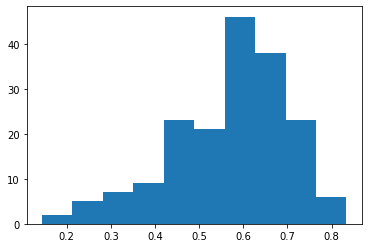

In [66]:
dups = ['conv_model','intr_model']
cross_bests = cross_cors.sort_values(by="cor",ascending=False).drop_duplicates(dups)
plt.hist(cross_bests['cor'])

## All Together

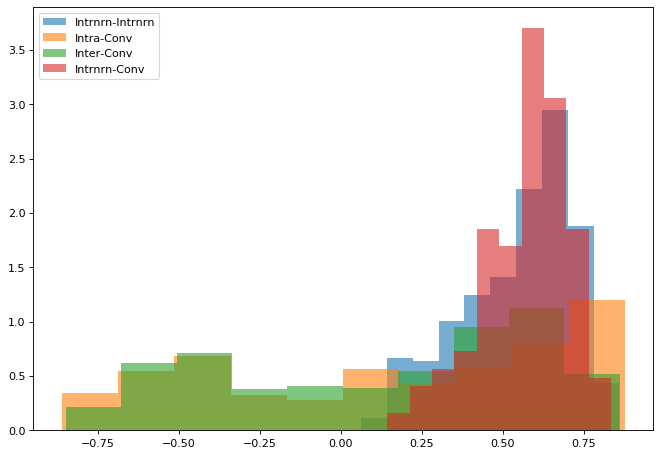

In [74]:
layers = {'sequential.0','sequential.4'}
same_layer = False
intr_bests = False
fig = plt.figure(figsize=(10,7),dpi=80)

if intr_bests:
    intr_cors['model'] = intr_cors['model1']
    temp = intr_cors
    intr_cors['model'] = intr_cors['model2']
    temp = temp.append(intr_cors)
    temp = intr_cors.sort_values(by="cor",ascending=False).drop_duplicates(["model"])
else:
    temp = intr_cors
plt.hist(temp['cor'],alpha=0.6,label="Intrnrn-Intrnrn",density=True)

conv_df = conv_cors.loc[conv_cors['model1']==conv_cors['model2']]
conv_df = conv_df.loc[conv_df['m1_layer'].isin(layers)&conv_df['m2_layer'].isin(layers)]
if same_layer:
    conv_df = conv_df.loc[conv_df['m1_layer']==conv_df['m2_layer']]
conv_df = conv_df.loc[conv_df['chan1']!=conv_df['chan2']]
# dups = ['model1','model2']
# conv_df = conv_df.sort_values(by="cor",ascending=False).drop_duplicates(dups)
plt.hist(conv_df['cor'],alpha=0.6,label="Intra-Conv",density=True)

conv_df = conv_cors.loc[(conv_cors['model1']!=conv_cors['model2'])]
conv_df = conv_df.loc[conv_df['m1_layer'].isin(layers)&conv_df['m2_layer'].isin(layers)]
if same_layer:
    conv_df = conv_df.loc[conv_df['m1_layer']==conv_df['m2_layer']]
dups = ['model1','model2','chan1','chan2']
conv_df = conv_df.sort_values(by="cor",ascending=False).drop_duplicates(dups)
plt.hist(conv_df['cor'],alpha=0.6,label="Inter-Conv",density=True)

plt.hist(cross_bests['cor'],alpha=0.6,label="Intrnrn-Conv",density=True)

plt.legend()
plt.show()